In [1]:
pip install torch torchvision timm transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 23.6 MB/s eta 0:00:00


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from timm.models import resnet50
from timm.data.mixup import Mixup
from timm.data.random_erasing import RandomErasing
from timm.loss import BinaryCrossEntropy
from torch.nn import BCEWithLogitsLoss

In [3]:
from torch.utils.data import DataLoader
from torchvision import datasets
import torchvision.transforms as transforms
from torchvision.transforms import RandomErasing

In [4]:
def get_device():
    """
    Determines the device to be used for tensor operations in PyTorch.

    This function checks if a CUDA-enabled GPU is available and returns
    'cuda' if so; otherwise, it returns 'cpu'. This is useful for ensuring
    that the code runs on a GPU when available, falling back to the CPU
    if necessary.

    Returns:
        torch.device: The device ('cuda' or 'cpu') that will be used
                      for computations.
    """
    return torch.device('cuda' if torch.cuda.is_available() else 'cpu')

device = get_device()

In [5]:
print(device)

cuda


In [6]:
transform_train = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Convert MNIST images to 3 channels
    transforms.RandomResizedCrop(224),  # Randomly crop and resize to 224x224
    transforms.RandomHorizontalFlip(),  # Random horizontal flip for augmentation
    transforms.ToTensor(),  # Convert image to PyTorch tensor
    transforms.Normalize((0.1307, 0.1307, 0.1307), (0.3081, 0.3081, 0.3081)),  # Normalize
    transforms.RandomErasing(p=0.5)  # Randomly erase part of the image (50% chance)
])

"""
This composition of transformations prepares images for training by:
1. Converting the MNIST images from 1 channel (grayscale) to 3 channels to ensure compatibility with models expecting RGB input.
2. Randomly cropping and resizing the image to 224x224 pixels, which helps the model become invariant to object scale and position.
3. Randomly flipping the image horizontally to augment the dataset, providing the model with varied input to improve generalization.
4. Converting the image to a PyTorch tensor, which is necessary for processing with PyTorch models.
5. Normalizing the image using the MNIST dataset's mean (0.1307) and standard deviation (0.3081) for better model training stability.
6. Randomly erasing parts of the image with a 50% chance, which helps the model learn to be robust to occlusions and missing features.
"""


"\nThis composition of transformations prepares images for training by:\n1. Converting the MNIST images from 1 channel (grayscale) to 3 channels to ensure compatibility with models expecting RGB input.\n2. Randomly cropping and resizing the image to 224x224 pixels, which helps the model become invariant to object scale and position.\n3. Randomly flipping the image horizontally to augment the dataset, providing the model with varied input to improve generalization.\n4. Converting the image to a PyTorch tensor, which is necessary for processing with PyTorch models.\n5. Normalizing the image using the MNIST dataset's mean (0.1307) and standard deviation (0.3081) for better model training stability.\n6. Randomly erasing parts of the image with a 50% chance, which helps the model learn to be robust to occlusions and missing features.\n"

In [7]:
transform_test = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Convert MNIST images to 3 channels
    transforms.Resize(224),  # Resize to 224x224
    transforms.ToTensor(),  # Convert image to PyTorch tensor
    transforms.Normalize((0.1307, 0.1307, 0.1307), (0.3081, 0.3081, 0.3081))  # Normalize
])

"""
This composition of transformations prepares images for testing by:
1. Converting the MNIST images from 1 channel (grayscale) to 3 channels to ensure compatibility with models expecting RGB input.
2. Resizing the image to 224x224 pixels, which standardizes the input size for the model.
3. Converting the image to a PyTorch tensor, enabling the model to process the data.
4. Normalizing the image using the MNIST dataset's mean (0.1307) and standard deviation (0.3081) to maintain consistency with the training data and improve model performance.
"""


"\nThis composition of transformations prepares images for testing by:\n1. Converting the MNIST images from 1 channel (grayscale) to 3 channels to ensure compatibility with models expecting RGB input.\n2. Resizing the image to 224x224 pixels, which standardizes the input size for the model.\n3. Converting the image to a PyTorch tensor, enabling the model to process the data.\n4. Normalizing the image using the MNIST dataset's mean (0.1307) and standard deviation (0.3081) to maintain consistency with the training data and improve model performance.\n"

In [8]:
# Load the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform_train, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform_test)

"""
The MNIST dataset is loaded using the torchvision.datasets.MNIST class. The training dataset
contains images and labels for training the model, while the test dataset is used for evaluating
the model's performance.

- `train_dataset`: Contains the training data with transformations applied via `transform_train`.
- `test_dataset`: Contains the test data with transformations applied via `transform_test`.
"""


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:11<00:00, 898614.06it/s] 


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 62760.80it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1240991.88it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 9942864.70it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



"\nThe MNIST dataset is loaded using the torchvision.datasets.MNIST class. The training dataset\ncontains images and labels for training the model, while the test dataset is used for evaluating\nthe model's performance.\n\n- `train_dataset`: Contains the training data with transformations applied via `transform_train`.\n- `test_dataset`: Contains the test data with transformations applied via `transform_test`.\n"

In [9]:

# Create data loaders for batching and shuffling the datasets
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

"""
Data loaders are created using the torch.utils.data.DataLoader class to facilitate batching
and shuffling of the datasets during training and testing.

- `train_loader`: Loads the training dataset in batches of 32, shuffling the data to ensure
  that the model learns from a varied sample of the dataset in each epoch.
- `test_loader`: Loads the test dataset in batches of 32 without shuffling, maintaining the
  order for consistent evaluation.
"""


'\nData loaders are created using the torch.utils.data.DataLoader class to facilitate batching\nand shuffling of the datasets during training and testing.\n\n- `train_loader`: Loads the training dataset in batches of 32, shuffling the data to ensure\n  that the model learns from a varied sample of the dataset in each epoch.\n- `test_loader`: Loads the test dataset in batches of 32 without shuffling, maintaining the\n  order for consistent evaluation.\n'

In [10]:
def load_and_transform_sample_image():
    """
    Loads a sample image from the MNIST dataset, applies transformations, and displays the result.

    Process:
    1. Loads a grayscale MNIST image.
    2. Converts the image to PIL format and applies the training transformations.
    3. Prints the shape of the transformed image to verify 3 channels.
    4. Displays the transformed image.

    Returns:
        None
    """
    sample_image = datasets.MNIST(root='./data', train=True, download=True).data[0].unsqueeze(0)
    sample_image = Image.fromarray(sample_image.numpy()[0], mode='L')  # Convert to PIL image
    transformed_image = transform_train(sample_image)  # Apply transformations
    print(f"Transformed image shape: {transformed_image.shape}")  # Print shape
    plt.imshow(transformed_image.permute(1, 2, 0).numpy())  # Display image
    plt.axis('off')  # Hide axes
    plt.show()

Transformed image shape: torch.Size([3, 224, 224])


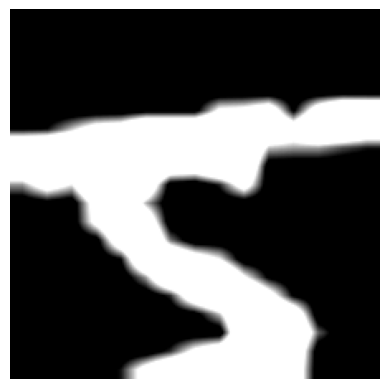

In [12]:
from PIL import Image
import matplotlib.pyplot as plt

load_and_transform_sample_image()

In [13]:
# Mixup and CutMix settings for augmentation
mixup_fn = Mixup(
    mixup_alpha=0.2,  # Mixup factor
    cutmix_alpha=1.0,  # CutMix factor
    cutmix_minmax=None,  # Default CutMix
    prob=1.0,  # Probability of applying Mixup/CutMix
    switch_prob=0.5  # Probability to switch between Mixup and CutMix
)

"""
Mixup and CutMix are data augmentation techniques used to improve model robustness by
creating new training examples through a combination of existing ones.

- `mixup_alpha`: Controls the degree of mixing between two images in Mixup. A higher value
  allows for more significant blending, while a lower value results in less mixing.

- `cutmix_alpha`: Controls the degree of mixing for CutMix, which involves cutting out
  a portion of one image and pasting it onto another. A higher value allows for more
  significant regions to be mixed.

- `cutmix_minmax`: Specifies the minimum and maximum ratio for the area cut and mixed.
  If set to `None`, default values are used.

- `prob`: The probability of applying either Mixup or CutMix to the input data. A value of
  1.0 means that the augmentation will always be applied.

- `switch_prob`: The probability of switching between Mixup and CutMix when augmenting
  the data. A value of 0.5 means there's an equal chance of applying either method.
"""


"\nMixup and CutMix are data augmentation techniques used to improve model robustness by\ncreating new training examples through a combination of existing ones.\n\n- `mixup_alpha`: Controls the degree of mixing between two images in Mixup. A higher value\n  allows for more significant blending, while a lower value results in less mixing.\n\n- `cutmix_alpha`: Controls the degree of mixing for CutMix, which involves cutting out\n  a portion of one image and pasting it onto another. A higher value allows for more\n  significant regions to be mixed.\n\n- `cutmix_minmax`: Specifies the minimum and maximum ratio for the area cut and mixed.\n  If set to `None`, default values are used.\n\n- `prob`: The probability of applying either Mixup or CutMix to the input data. A value of\n  1.0 means that the augmentation will always be applied.\n\n- `switch_prob`: The probability of switching between Mixup and CutMix when augmenting\n  the data. A value of 0.5 means there's an equal chance of applying

In [14]:
# Load ResNet-50 model with pretrained weights and adjust for MNIST classification
model = resnet50(pretrained=True, num_classes=10)
model.fc = nn.Linear(model.fc.in_features, 10)  # Adjust the final layer for 10 classes
model = model.to(device)

"""
Load and configure the ResNet-50 model for the MNIST classification task.

- `resnet50(pretrained=True)`: Loads the ResNet-50 model architecture with weights
  pretrained on ImageNet. This allows the model to leverage learned features from
  a larger dataset, improving performance on the MNIST dataset.

- `num_classes=10`: Specifies the number of output classes for the model. MNIST
  has 10 classes (digits 0-9).

- `model.fc = nn.Linear(model.fc.in_features, 10)`: Modifies the fully connected
  layer (classifier) of the ResNet-50 model to output 10 classes instead of the
  default 1000 classes (used for ImageNet classification). This is crucial for
  adapting the model to the MNIST dataset.

- `model = model.to(device)`: Moves the model to the specified device (CPU or GPU)
  for training or inference, ensuring that it can utilize available hardware acceleration.
"""


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

'\nLoad and configure the ResNet-50 model for the MNIST classification task.\n\n- `resnet50(pretrained=True)`: Loads the ResNet-50 model architecture with weights\n  pretrained on ImageNet. This allows the model to leverage learned features from\n  a larger dataset, improving performance on the MNIST dataset.\n\n- `num_classes=10`: Specifies the number of output classes for the model. MNIST\n  has 10 classes (digits 0-9).\n\n- `model.fc = nn.Linear(model.fc.in_features, 10)`: Modifies the fully connected\n  layer (classifier) of the ResNet-50 model to output 10 classes instead of the\n  default 1000 classes (used for ImageNet classification). This is crucial for\n  adapting the model to the MNIST dataset.\n\n- `model = model.to(device)`: Moves the model to the specified device (CPU or GPU)\n  for training or inference, ensuring that it can utilize available hardware acceleration.\n'

In [15]:
# Define the loss function (CrossEntropy for classification)
criterion = nn.CrossEntropyLoss()

# Define the optimizer (AdamW) and learning rate scheduler (CosineAnnealingLR)
optimizer = optim.AdamW(model.parameters(), lr=5e-4, weight_decay=1e-2)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)

"""
Define the loss function, optimizer, and learning rate scheduler for training.

- `criterion = nn.CrossEntropyLoss()`:
  - Specifies the loss function used for multi-class classification tasks.
  - Cross-entropy loss measures the performance of the classification model
    whose output is a probability value between 0 and 1. It compares the predicted
    class probabilities with the true labels and computes the average log
    probability of the correct class.

- `optimizer = optim.AdamW(model.parameters(), lr=5e-4, weight_decay=1e-2)`:
  - Initializes the AdamW optimizer, which is an adaptive learning rate optimizer
    that combines the benefits of Adam with weight decay regularization.
  - The learning rate (`lr`) is set to 5e-4, which controls how much to adjust
    the model parameters during training.
  - `weight_decay=1e-2` adds L2 regularization to help prevent overfitting
    by penalizing large weights.

- `scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)`:
  - Defines a learning rate scheduler that reduces the learning rate according
    to a cosine annealing schedule.
  - `T_max=10` specifies the number of epochs after which the learning rate
    will reach its minimum value before restarting, helping to improve training
    stability and performance.
"""


'\nDefine the loss function, optimizer, and learning rate scheduler for training.\n\n- `criterion = nn.CrossEntropyLoss()`:\n  - Specifies the loss function used for multi-class classification tasks.\n  - Cross-entropy loss measures the performance of the classification model\n    whose output is a probability value between 0 and 1. It compares the predicted\n    class probabilities with the true labels and computes the average log\n    probability of the correct class.\n\n- `optimizer = optim.AdamW(model.parameters(), lr=5e-4, weight_decay=1e-2)`:\n  - Initializes the AdamW optimizer, which is an adaptive learning rate optimizer\n    that combines the benefits of Adam with weight decay regularization.\n  - The learning rate (`lr`) is set to 5e-4, which controls how much to adjust\n    the model parameters during training.\n  - `weight_decay=1e-2` adds L2 regularization to help prevent overfitting\n    by penalizing large weights.\n\n- `scheduler = optim.lr_scheduler.CosineAnnealingLR(

In [16]:
def train(model, device, train_loader, optimizer, epoch):
    """
    Trains the model for one epoch using the provided data loader, optimizer, and device.

    Args:
        model (torch.nn.Module): The neural network model being trained.
        device (torch.device): The device (CPU or GPU) for computation.
        train_loader (torch.utils.data.DataLoader): DataLoader for the training dataset.
        optimizer (torch.optim.Optimizer): Optimizer for model parameters.
        epoch (int): The current training epoch number.

    Process:
    - Sets the model in training mode.
    - Iterates over batches of data, applying Mixup or CutMix augmentations to the input data and targets.
    - Computes the model's output based on the input data.
    - Calculates the loss using the specified loss function.
    - Backpropagates the loss to update model weights.
    - Prints training progress every 100 batches.

    Notes:
        - The `mixup_fn` function is applied to the data and targets to introduce data augmentation.
        - If the targets are in one-hot format (multi-dimensional), they are converted back to class indices for compatibility with CrossEntropyLoss.
    """
    model.train()  # Set model to training mode
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)  # Move data to device

        # Apply Mixup/CutMix augmentation
        data, targets = mixup_fn(data, target)  # This will return two tensors

        # If targets are in one-hot format after mixup, convert them to class indices
        if targets.ndim > 1:  # Check if targets are multi-dimensional
            targets = targets.argmax(dim=1)  # Convert one-hot targets to class indices

        optimizer.zero_grad()  # Clear previous gradients
        output = model(data)  # Forward pass
        loss = criterion(output, targets)  # Compute loss
        loss.backward()  # Backpropagate loss
        optimizer.step()  # Update model weights

        if batch_idx % 100 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)}] Loss: {loss.item():.6f}')


In [17]:
def test(model, device, test_loader):
    """
    Evaluates the model on the test dataset to measure its performance.

    Args:
        model (torch.nn.Module): The trained model to be evaluated.
        device (torch.device): The device (CPU or GPU) used for computation.
        test_loader (torch.utils.data.DataLoader): DataLoader for the test dataset.

    Process:
    - Sets the model to evaluation mode, which disables dropout and batch normalization updates.
    - Initializes variables to track the cumulative test loss and the number of correct predictions.
    - Iterates over batches of test data:
        - Moves the data and target labels to the specified device.
        - Computes the model's output predictions for the input data.
        - Accumulates the test loss by summing the loss for each batch.
        - Determines the predicted class by finding the index of the maximum log-probability.
        - Counts the number of correct predictions by comparing the predicted classes with the target labels.
    - Computes the average test loss and accuracy over the entire test dataset.
    - Prints the average loss and accuracy metrics.

    Example:
        test(model, device, test_loader)
    """
    model.eval()  # Set model to evaluation mode
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()  # Sum batch losses
            pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()  # Count correct predictions

    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    print(f'Test set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({accuracy:.2f}%)')


In [18]:
for epoch in range(1, 6):
    """
    Training and testing the model over multiple epochs.

    This loop iterates over a specified number of epochs to train and evaluate the model.
    For each epoch, the following steps are performed:
    - The model is trained using the `train` function, which updates the model weights based on the training dataset.
    - The model's performance is evaluated on the test dataset using the `test` function, which calculates the average loss and accuracy.
    - The learning rate is adjusted using the `scheduler`, which helps improve training stability and convergence.

    Args:
        epoch (int): Current epoch number, starting from 1 to 10. This is used for logging and tracking training progress.
    """
    train(model, device, train_loader, optimizer, epoch)  # Train for one epoch
    test(model, device, test_loader)  # Evaluate on the test set
    scheduler.step()  # Adjust the learning rate based on the scheduler


Train Epoch: 1 [0/60000] Loss: 2.299524
Train Epoch: 1 [3200/60000] Loss: 2.162246
Train Epoch: 1 [6400/60000] Loss: 0.936295
Train Epoch: 1 [9600/60000] Loss: 1.187570
Train Epoch: 1 [12800/60000] Loss: 1.196038
Train Epoch: 1 [16000/60000] Loss: 0.873035
Train Epoch: 1 [19200/60000] Loss: 0.576654
Train Epoch: 1 [22400/60000] Loss: 0.744200
Train Epoch: 1 [25600/60000] Loss: 0.552834
Train Epoch: 1 [28800/60000] Loss: 0.605903
Train Epoch: 1 [32000/60000] Loss: 0.528708
Train Epoch: 1 [35200/60000] Loss: 0.670577
Train Epoch: 1 [38400/60000] Loss: 0.574218
Train Epoch: 1 [41600/60000] Loss: 1.433802
Train Epoch: 1 [44800/60000] Loss: 0.562190
Train Epoch: 1 [48000/60000] Loss: 0.556507
Train Epoch: 1 [51200/60000] Loss: 0.997458
Train Epoch: 1 [54400/60000] Loss: 0.911657
Train Epoch: 1 [57600/60000] Loss: 0.438367
Test set: Average loss: 0.0023, Accuracy: 9770/10000 (97.70%)
Train Epoch: 2 [0/60000] Loss: 0.429555
Train Epoch: 2 [3200/60000] Loss: 0.610172
Train Epoch: 2 [6400/60000

In [20]:
import numpy as np

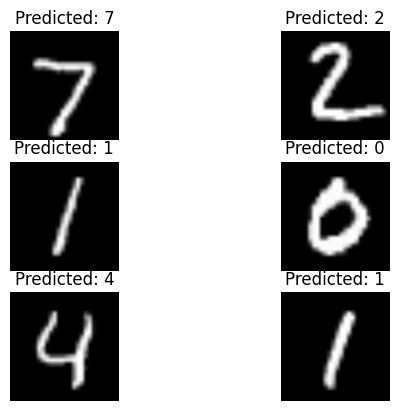

In [22]:
def visualize_model(model, test_loader, num_images=6):
    """
    Visualizes the predictions of the trained model on a few validation images.

    Parameters:
        model (torch.nn.Module): The trained model to be visualized.
        test_loader (DataLoader): DataLoader for the test dataset, providing images and labels.
        num_images (int): The number of images to visualize. Default is 6.

    Process:
        - Sets the model to evaluation mode to disable gradient updates.
        - Iterates over batches of the test data and retrieves model predictions.
        - For each image, displays it alongside the predicted class.
        - Unnormalizes the images for proper visualization.
        - Stops visualizing once the specified number of images has been displayed.

    Note:
        The images are displayed in grayscale and the normalization parameters used
        should match those used during training. Adjust these values if different
        normalization techniques were applied.
    """
    # Save the model's current training state to restore later
    was_training = model.training
    model.eval()  # Set model to evaluation mode (disables gradient updates)

    images_so_far = 0
    fig = plt.figure()  # Create a new figure for plotting images

    with torch.no_grad():  # No need to compute gradients during visualization
        # Iterate over batches of test data
        for inputs, labels in test_loader:
            inputs = inputs.to(device)  # Move inputs to the device (GPU or CPU)
            labels = labels.to(device)  # Move labels to the device

            outputs = model(inputs)  # Get the model's predictions
            _, preds = torch.max(outputs, 1)  # Get the predicted class with the highest score

            # Loop over the images in the batch
            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images // 2, 2, images_so_far)  # Create a subplot for each image
                ax.axis('off')  # Hide the axis
                ax.set_title(f'Predicted: {preds[j].item()}')  # Set the title to the predicted class
                img = inputs.cpu().data[j].numpy().transpose((1, 2, 0))  # Convert tensor to numpy array and adjust dimensions

                # Unnormalize the image before displaying
                img = (img * 0.3081 + 0.1307)  # Reverse the normalization
                img = np.clip(img, 0, 1)  # Ensure values are between 0 and 1

                plt.imshow(img, cmap='gray')  # Display grayscale images

                # Stop once the required number of images are displayed
                if images_so_far == num_images:
                    model.train(mode=was_training)  # Restore the model's training state
                    return

        # Restore the model's training state if not enough images were processed
        model.train(mode=was_training)

# Visualize predictions using the test_loader
visualize_model(model, test_loader)


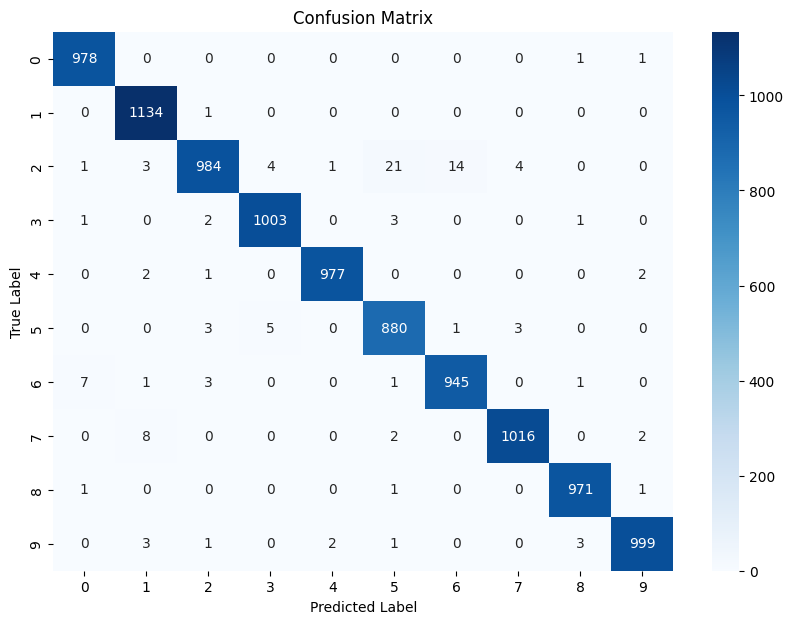

In [30]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(true_labels, pred_labels, classes):
    """
    Plots a confusion matrix using Seaborn's heatmap.

    Args:
        true_labels (numpy array): True labels from the dataset. Should be a 1D array-like structure.
        pred_labels (numpy array): Predicted labels from the model. Should be a 1D array-like structure.
        classes (list): List of class names corresponding to the labels in the dataset.

    Process:
        - Computes the confusion matrix using the true and predicted labels.
        - Visualizes the confusion matrix as a heatmap, where each cell shows the count of predictions.
        - Annotates each cell with the count of predictions and formats the heatmap with appropriate labels.

    Note:
        - Ensure that the lengths of `true_labels` and `pred_labels` match.
        - The `classes` list should contain labels corresponding to the indices in the confusion matrix.
    """
    cm = confusion_matrix(true_labels, pred_labels)  # Compute confusion matrix
    plt.figure(figsize=(10, 7))  # Set figure size for the heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)  # Create heatmap
    plt.ylabel('True Label')  # Label for y-axis
    plt.xlabel('Predicted Label')  # Label for x-axis
    plt.title('Confusion Matrix')  # Add a title
    plt.show()  # Display the heatmap

# Collect true labels and predicted labels
true_labels = []  # Initialize list to store true labels
pred_labels = []  # Initialize list to store predicted labels

# Evaluate the model on the test set
model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # Disable gradient calculation for inference
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)  # Move data and targets to the device
        output = model(data)  # Get model predictions
        preds = output.argmax(dim=1)  # Get the predicted classes
        true_labels.extend(target.cpu().numpy())  # Append true labels
        pred_labels.extend(preds.cpu().numpy())  # Append predicted labels

# Convert lists to numpy arrays for confusion matrix
true_labels = np.array(true_labels)  # Convert true labels list to numpy array
pred_labels = np.array(pred_labels)  # Convert predicted labels list to numpy array

# Plot confusion matrix
plot_confusion_matrix(true_labels, pred_labels, classes=[str(i) for i in range(10)])  # Plot the confusion matrix


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

In [35]:
def set_seed(seed):
    """
    Sets the seed for reproducibility in random operations across different libraries.

    Args:
        seed (int): The seed value for random operations. This ensures that results can be reproduced
                    by initializing the random number generators to the same state.

    Process:
        - Sets the seed for PyTorch's CPU random number generator.
        - Sets the seed for all CUDA devices if available, ensuring that operations on GPU are also reproducible.
        - Sets the seed for NumPy's random number generator, aligning it with PyTorch's seed.
    """
    torch.manual_seed(seed)  # Set seed for CPU
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)  # Set seed for all GPU devices
    np.random.seed(seed)

In [36]:
def calculate_metrics(output, target):
    """
    Calculates performance metrics such as accuracy, precision, recall, and F1 score.

    Args:
        output (torch.Tensor): The model's predicted output logits. Should be the raw outputs from
                               the model before applying any activation functions.
        target (torch.Tensor): The true target labels. This tensor should contain the ground truth
                               class indices for each sample.

    Returns:
        dict: A dictionary containing the calculated metrics, including:
            - 'accuracy': Overall accuracy of the model.
            - 'precision': Precision score of the model.
            - 'recall': Recall score of the model.
            - 'f1_score': F1 score of the model.

    Process:
        - Converts the predicted logits to class indices by taking the argmax along the class dimension.
        - Computes accuracy, precision, recall, and F1 score using the scikit-learn library.
        - Returns the calculated metrics in a dictionary format.
    """
    pred = output.argmax(dim=1, keepdim=True).cpu().numpy()  # Get predicted class indices
    true = target.cpu().numpy()  # Get true class indices

    acc = accuracy_score(true, pred)  # Calculate accuracy
    precision = precision_score(true, pred, average='weighted', zero_division=0)  # Calculate precision
    recall = recall_score(true, pred, average='weighted', zero_division=0)  # Calculate recall
    f1 = f1_score(true, pred, average='weighted', zero_division=0)  # Calculate F1 score

    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }


In [38]:
def evaluate_performance_across_seeds(seeds, model, train_loader, test_loader):
    """
    Evaluates model performance across different seeds and computes variance in metrics.

    Args:
        seeds (list of int): List of seeds for different training runs.
                             Each seed will be used to initialize the random state for reproducibility.
        model (torch.nn.Module): The neural network model to be trained and evaluated.
        train_loader (DataLoader): DataLoader for the training dataset, providing batches for training.
        test_loader (DataLoader): DataLoader for the test dataset, providing batches for evaluation.

    Returns:
        tuple: A tuple containing:
            - dict: Mean metrics including accuracy, precision, recall, and F1 scores across seeds.
            - dict: Variance metrics including accuracy, precision, recall, and F1 scores across seeds.

    Process:
        - Iterates through each seed to train and evaluate the model.
        - For each seed, sets the random seed for reproducibility.
        - Reinitializes the model and optimizer for each training run.
        - Trains the model for a specified number of epochs and evaluates it on the test dataset.
        - Collects performance metrics after each evaluation.
        - Computes the mean and variance of the collected metrics across all seeds.
    """
    performance_metrics = []

    for seed in seeds:
        print(f"Training with seed: {seed}")
        set_seed(seed)

        # Reinitialize model and optimizer for each seed
        model = resnet50(pretrained=True, num_classes=10)
        model.fc = nn.Linear(model.fc.in_features, 10)
        model = model.to(device)
        optimizer = optim.AdamW(model.parameters(), lr=5e-4, weight_decay=1e-2)
        scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)

        # Train and test the model
        for epoch in range(1,2):  # Shorter training for seed experiments
            train(model, device, train_loader, optimizer, epoch)
            test(model, device, test_loader)

        # Collect metrics on test dataset
        model.eval()
        all_preds = []
        all_labels = []
        with torch.no_grad():
            for data, target in test_loader:
                data, target = data.to(device), target.to(device)
                output = model(data)
                metrics = calculate_metrics(output, target)
                performance_metrics.append(metrics)

    # Calculate mean and variance across seeds
    mean_metrics = {
        'accuracy': np.mean([m['accuracy'] for m in performance_metrics]),
        'precision': np.mean([m['precision'] for m in performance_metrics]),
        'recall': np.mean([m['recall'] for m in performance_metrics]),
        'f1_score': np.mean([m['f1_score'] for m in performance_metrics]),
    }

    variance_metrics = {
        'accuracy': np.var([m['accuracy'] for m in performance_metrics]),
        'precision': np.var([m['precision'] for m in performance_metrics]),
        'recall': np.var([m['recall'] for m in performance_metrics]),
        'f1_score': np.var([m['f1_score'] for m in performance_metrics]),
    }

    print(f"Mean Metrics: {mean_metrics}")
    print(f"Variance Metrics: {variance_metrics}")

    return mean_metrics, variance_metrics

# Experiment across multiple seeds
seeds = [42, 123, 456, 789, 101112]
mean_metrics, variance_metrics = evaluate_performance_across_seeds(seeds, model, train_loader, test_loader)


Training with seed: 42
Train Epoch: 1 [0/60000] Loss: 2.311912
Train Epoch: 1 [3200/60000] Loss: 1.728106
Train Epoch: 1 [6400/60000] Loss: 1.267432
Train Epoch: 1 [9600/60000] Loss: 0.866897
Train Epoch: 1 [12800/60000] Loss: 0.650218
Train Epoch: 1 [16000/60000] Loss: 1.597111
Train Epoch: 1 [19200/60000] Loss: 0.751273
Train Epoch: 1 [22400/60000] Loss: 1.651365
Train Epoch: 1 [25600/60000] Loss: 0.881306
Train Epoch: 1 [28800/60000] Loss: 0.701880
Train Epoch: 1 [32000/60000] Loss: 1.129225
Train Epoch: 1 [35200/60000] Loss: 0.801862
Train Epoch: 1 [38400/60000] Loss: 0.579271
Train Epoch: 1 [41600/60000] Loss: 0.776795
Train Epoch: 1 [44800/60000] Loss: 1.649840
Train Epoch: 1 [48000/60000] Loss: 0.233502
Train Epoch: 1 [51200/60000] Loss: 0.236901
Train Epoch: 1 [54400/60000] Loss: 0.474055
Train Epoch: 1 [57600/60000] Loss: 0.654146
Test set: Average loss: 0.0022, Accuracy: 9810/10000 (98.10%)
Training with seed: 123
Train Epoch: 1 [0/60000] Loss: 2.295527
Train Epoch: 1 [3200/6

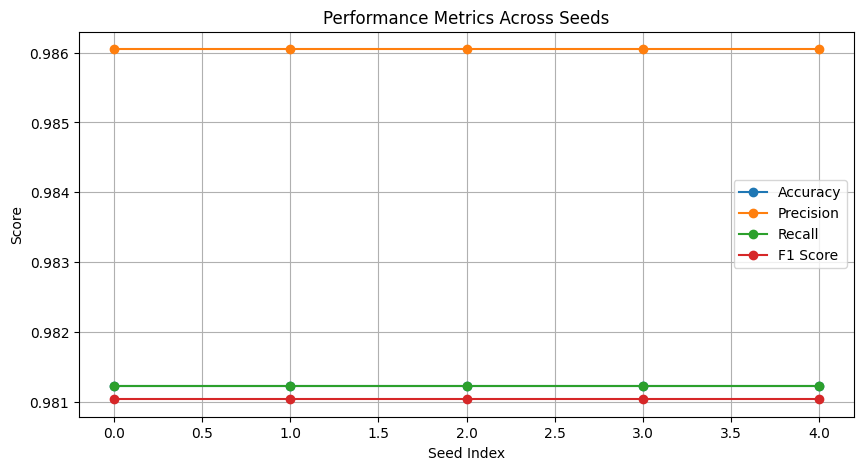

In [39]:
import matplotlib.pyplot as plt

def plot_metrics(metrics, title):
    """
    Plots the accuracy, precision, recall, and F1 score for different seeds.

    Args:
        metrics (dict): A dictionary containing the following keys:
            - 'accuracy': List of accuracy scores for each seed.
            - 'precision': List of precision scores for each seed.
            - 'recall': List of recall scores for each seed.
            - 'f1_score': List of F1 scores for each seed.
        title (str): Title for the plot, describing the contents.

    Process:
        - Initializes a new figure for plotting.
        - Plots each metric as a line graph with markers for clarity.
        - Sets labels for the axes and the title of the plot.
        - Displays the plot with a grid for better readability.
    """
    plt.figure(figsize=(10, 5))

    # Plotting the different metrics
    plt.plot(metrics['accuracy'], label="Accuracy", marker='o')
    plt.plot(metrics['precision'], label="Precision", marker='o')
    plt.plot(metrics['recall'], label="Recall", marker='o')
    plt.plot(metrics['f1_score'], label="F1 Score", marker='o')

    plt.title(title)
    plt.xlabel("Seed Index")
    plt.ylabel("Score")
    plt.legend()
    plt.grid(True)
    plt.show()

# Extract metrics across different seeds for plotting
metrics_to_plot = {
    'accuracy': [mean_metrics['accuracy']] * len(seeds),  # Repeat the mean metric for each seed
    'precision': [mean_metrics['precision']] * len(seeds),
    'recall': [mean_metrics['recall']] * len(seeds),
    'f1_score': [mean_metrics['f1_score']] * len(seeds)
}

plot_metrics(metrics_to_plot, "Performance Metrics Across Seeds")


In [40]:
!pip freeze > requirements.txt

In [41]:
from google.colab import files
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>